DAQ s1940521 Initialised 2020-12-02 20:54:56.814686 Q=0.009765625
licensed to Ewan Holmes.
coursework connected.
triggered at 2020-12-02 20:54:56.817466


<IPython.core.display.Javascript object>


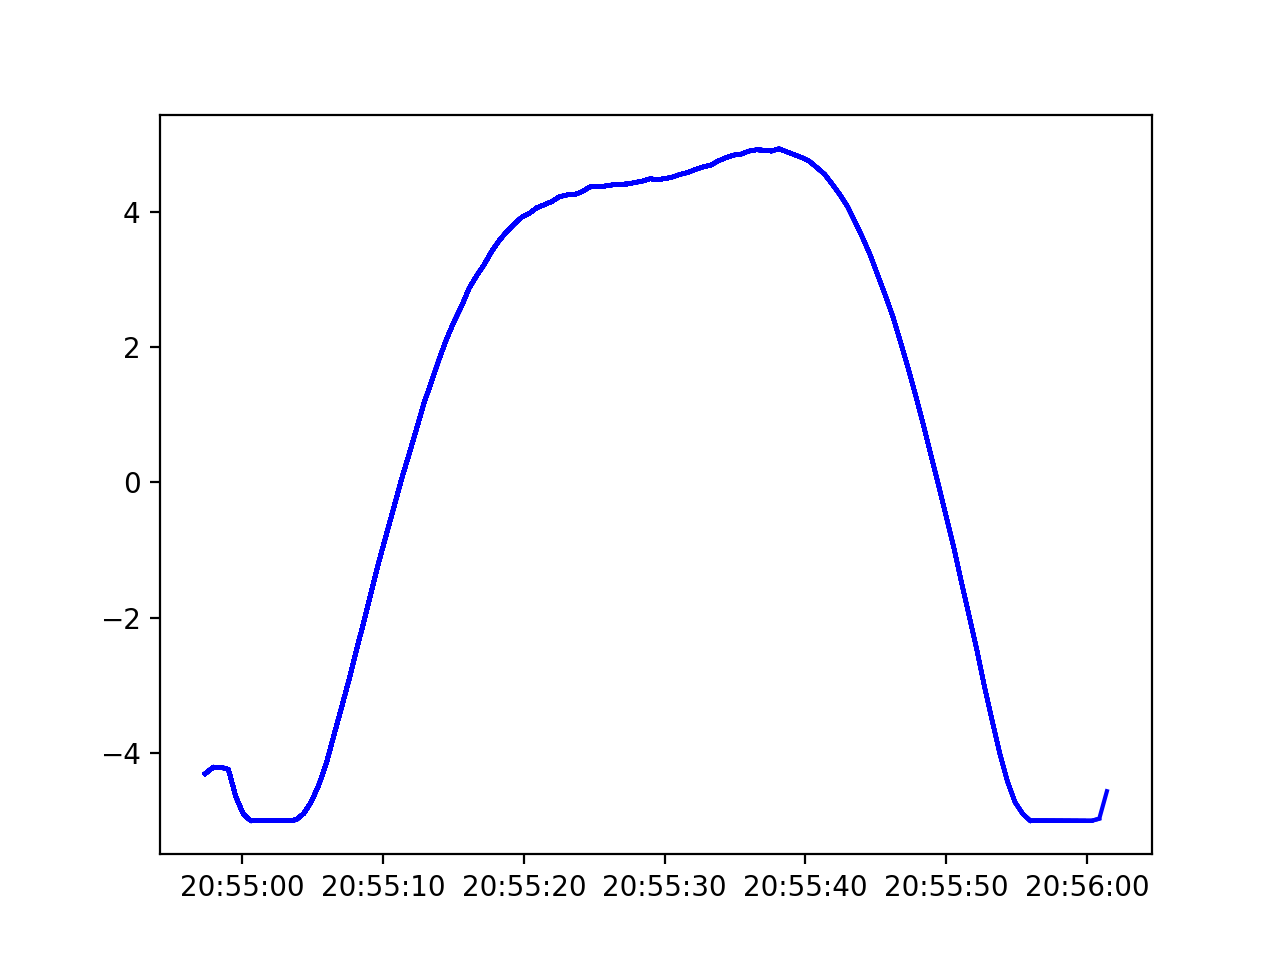

Red Light ON - Voltage below -2.56V - at 2020-12-02 20:54:57.374369
Lights OFF at 2020-12-02 20:55:08.133731
Green Light ON - Voltage above 4.27V - at 2020-12-02 20:55:24.132146
Lights OFF at 2020-12-02 20:55:42.432616
Red Light ON - Voltage below -2.56V - at 2020-12-02 20:55:52.702973


In [28]:
'''Coursework 2 is a file of written code for using a blinkstick to interpret 
the personalised data received from a Data Acquisition system from the Scada.py 
library

It takes the voltage readings from the DAQ over a given time, converts them into 
"real" voltage readings, shifts them so that it outputs voltage values between 5V 
and -5V, filters out the noise and directs the blinkstick to act accordingly

The blinkstick will act as a warning light; showing red when the voltage values 
go below -2.56V and showing green when the voltage values go above 4.27V. 
The code can also be easily programmed using the warning_light_alarm function to 
sound an audible alarm when these thresholds are breached and halt the process 
until the operator has acknowledged the alarm state

The code will print out the times at which the warning lights on the blinkstick 
turn on and off as well as producing a real time graph of the voltage against
time so the operator can monitor the voltage status

At the end of the given time period, the blinkstick will turn itself off
'''

# Import External Modules
from scada import DAQ
from blinkstick import blinkstick 
import time 
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import os
import keyboard

# DAQ Setup
my_daq = DAQ()       
my_daq.connect('coursework')
my_daq.trigger()
Q = my_daq.Q # Volts per bit constant

# Find Blinkstick
bstick = blinkstick.find_first()

# Define All Functions
def warning_light(i): # Setting only a warning light
    if i=="green":
        for x in range (0,8):
            bstick.set_color(index=x,name="green")
        print("Green Light ON - Voltage above 4.27V - at",time)
    if i=="red":
        for x in range (0,8):
            bstick.set_color(index=x,name="red")
        print("Red Light ON - Voltage below -2.56V - at",time)
    else:
        for x in range (0,8):
            bstick.set_color(index=x,name=i) # Allows different colour of
                                             #warning light if required

def warning_light_alarm(i): # Setting a warning light with alarm and acknowledgement
    if i=="green":
        for x in range (0,8):
            bstick.set_color(index=x,name="green")
        print("Green Light ON - Voltage above 4.27V - at",time)
        os.system("afplay alarm1.m4a") # Green Light Alarm
        input("Press Enter...") # User acknowledgment that threshold has been reached
    if i=="red":
        for x in range (0,8):
            bstick.set_color(index=x,name="red")
        print("Red Light ON - Voltage below -2.56V - at",time)
        os.system("afplay alarm1.wav") # Red Light Alarm
        input("Press Enter...") # User acknowledgement that threshold has been reached
    else:
        for x in range (0,8):
            bstick.set_color(index=x,name=i) # Allows different colour of
                                             #warning light if required

def blackout(): # Turning Light Off
    for x in range (0,8):
        bstick.set_color(index=x,name="black")
    
def moving_average(f,V):     # Calculating Value Averages
    n=5                      # Number of terms to average (+1)
    def mean(nums):          # Calculating average of terms
        return float(sum(nums)) / max(len(nums), 1)
    f.append(V)
    avgV = mean(f)
    if len(f) == n:
        f.pop(0) # Removes first value from list of values to
                 #average, so averaging will only start when
                 #there are enough terms to calculate
    return (avgV)

# Variables
vdata=[] # Y-axis for real-time graph
tdata=[] # X-axis for real-time graph

# Real-time graph parameters
%matplotlib notebook
plt.rcParams["animation.html"] = "jshtml" # Code for graph animation
fig = plt.figure()                        # Plotting the graph
ax = fig.add_subplot(111)                 # Defines first position of subplot
fig.show()                                # Displays graph

# Initial Conditions
isred=False   # Sets condition for red warning light
isgreen=False # Sets condition for green warning light
blackout()    # Turns all lights off for simulation

## Simulation
# Initiation
for time in range(120):
    time,voltage = my_daq.next_reading()  # Triggers voltage readings every
                                          #0.5 seconds for 1 minute
    V=(voltage*Q)-5                       # Converts bits to real voltage
    '''if not (moving_average(f,V)):
           vdata = V
       else:
           avgV = sum(n terms)/len(n terms)
           vdata = avgV
    '''
    # Calculating average of real voltage
    avgV=moving_average(f,V)              # Creates an average voltage based
                                          #on real voltage values
    tdata.append(time)                    # Adds all new times to list
    vdata.append(avgV)                    # Adds all new voltages to list
    
    # Conditions for light signals
    if avgV >= 4.27:
        if not(isgreen):
            warning_light("green")        # Turns on green warning light
            isgreen=True                  # Sets green light condition
            isred=False                   # Sets red light condition
        
    elif avgV <= -2.56:
        if not(isred):
            warning_light("red")          # Turns on red warning light
            isred=True                    # Sets red light condition
            isgreen=False                 # Sets green light condition
    else:
        if isred or isgreen:
            print("Lights OFF at",time)
            isred=False                   # Sets red light condition
            isgreen=False                 # Sets green light condition
            blackout()                    # Turns off all lights
    
    # Plotting Real-time Graph
    ax.plot(tdata,vdata, color="b")       # Plots vdata against tdata in blue
    fig.canvas.draw()                     # Draws graph in real time

# Complete Simulation
blackout() # Turns off all lights to finish

In [26]:
blackout()